### ML Model for Stock Return Prediction
Using Richard's ceo_gender_file
Try to predict stock return using the available variables
#### Data Description
* 1236 records
#### Predictors that I use
* at
* lt
* che
* ni
* sale
* execrank
* exchange_id
* gender_id
* state_id
* days_becameceo
* zip
* FF_48
* shrout_0220
Y: ret_0220_0325

In [45]:
import pandas as pd
import numpy as np
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import os
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from matplotlib import pyplot

In [46]:
# Read the data
print(os.listdir())
ncols = 0
with open("ceo_gender_training.csv") as f:
    ncols = len(f.readline().split(','))
ceo_data = pd.read_csv("ceo_gender_training.csv")
ceo_data.rename(columns={ceo_data.columns[0]: "pid" }, inplace = True)
ceo_data_small = ceo_data[["at", "lt", "che", "ni", "sale", "execrank", "exchange_id", 
                           "gender_id", "state_id", "days_becameceo", "zip", "FF_48", "shrout_0220", "ret_0220_0325"]]
ceo_data_small.dtypes

['QTR2', 'QTR4', 'QTR3', 'header_info.xlsx', '.DS_Store', '~$header_info.xlsx', 'ML_Model_with_Text.ipynb', 'LDA_Topic_Modeling.ipynb', 'QTR1', 'Gender_Classification_with_Sentiment.ipynb', 'ML_Model_Stock_Return.ipynb', '.ipynb_checkpoints', 'Gender_Classification_Using_Text.ipynb', 'Gender_Classification_Without_Text.ipynb', 'ceo_gender_training.csv']


at                float64
lt                float64
che               float64
ni                float64
sale              float64
execrank          float64
exchange_id         int64
gender_id           int64
state_id            int64
days_becameceo    float64
zip                 int64
FF_48               int64
shrout_0220       float64
ret_0220_0325     float64
dtype: object

# New Section

In [3]:
data = np.array(ceo_data_small)
data = data[~np.isnan(data).any(axis=1)]
X = data[:,0:13]
y = data[:,13]
# split trian and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print(X)

[[7.151101e+03 3.233706e+03 1.060970e+02 ... 1.174700e+04 4.100000e+01
  1.433910e+05]
 [3.643084e+03 3.180930e+03 6.703000e+01 ... 2.311600e+04 4.100000e+01
  6.285200e+04]
 [2.715350e+03 1.878906e+03 7.794400e+01 ... 5.512000e+04 4.100000e+01
  9.579200e+04]
 ...
 [2.190603e+03 1.471367e+03 3.530200e+01 ... 1.521200e+04 8.000000e+00
  3.129000e+04]
 [6.274500e+03 2.645900e+03 8.950000e+01 ... 9.458300e+04 1.200000e+01
  4.906200e+04]
 [3.516447e+03 1.935402e+03 1.511640e+02 ... 4.414500e+04 2.100000e+01
  5.785800e+04]]


In [34]:
# define the keras model for deep learning
model = Sequential()
model.add(Dense(5, input_dim=13, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [35]:
# compile the keras model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
94/94 [==============================] - 0s 817us/step - loss: 0.1547 - mean_squared_error: 0.1547
Epoch 2/150
94/94 [==============================] - 0s 591us/step - loss: 0.1563 - mean_squared_error: 0.1563
Epoch 3/150
94/94 [==============================] - 0s 636us/step - loss: 0.1527 - mean_squared_error: 0.1527
Epoch 4/150
94/94 [==============================] - 0s 581us/step - loss: 0.1440 - mean_squared_error: 0.1440
Epoch 5/150
94/94 [==============================] - 0s 771us/step - loss: 0.1505 - mean_squared_error: 0.1505
Epoch 6/150
94/94 [==============================] - 0s 560us/step - loss: 0.1461 - mean_squared_error: 0.1461
Epoch 7/150
94/94 [==============================] - 0s 623us/step - loss: 0.1485 - mean_squared_error: 0.1485
Epoch 8/150
94/94 [==============================] - 0s 588us/step - loss: 0.1516 - mean_squared_error: 0.1516
Epoch 9/150
94/94 [==============================] - 0s 557us/step - loss: 0.1461 - mean_squared_error: 0.1461
E

94/94 [==============================] - 0s 694us/step - loss: 0.1535 - mean_squared_error: 0.1535
Epoch 147/150
94/94 [==============================] - 0s 635us/step - loss: 0.1502 - mean_squared_error: 0.1502
Epoch 148/150
94/94 [==============================] - 0s 715us/step - loss: 0.1517 - mean_squared_error: 0.1517
Epoch 149/150
94/94 [==============================] - 0s 576us/step - loss: 0.1517 - mean_squared_error: 0.1517
Epoch 150/150
94/94 [==============================] - 0s 630us/step - loss: 0.1504 - mean_squared_error: 0.1504


In [36]:
# evaluate the keras model
# _, mse = model.evaluate(X_test, y_test)
# print('MSE: %.2f' % (mse*100))
results = model.evaluate(X_test, y_test, batch_size=128)
print("test loss, test mse:", results)

2/2 [==============================] - 0s 1ms/step - loss: 0.1349 - mean_squared_error: 0.1349
test loss, test mse: [0.1349479705095291, 0.1349479705095291]


In [ ]:
# Old code kept for reference
# ceo_data_small['gender'] = ceo_data_small['gender'].apply(lambda x: int(x == "FEMALE"))
# ceo_data_small['DateFiled'] = ceo_data_small['DateFiled'].apply(lambda x: pd.to_datetime(x) - pd.to_datetime("2020-01-01"))
# ceo_data_small['DateFiled'] = ceo_data_small['DateFiled'].apply(lambda x: x.days)
# ceo_data_small['becameceo'] = ceo_data_small['becameceo'].apply(lambda x: pd.to_datetime("2021-01-01") - pd.to_datetime(x))
# ceo_data_small['becameceo'] = ceo_data_small['becameceo'].apply(lambda x: x.days)
# #ceo_data_small['state'] = ceo_data_small['state'].astype('category')
# ceo_data_small.shape

In [7]:
# run the data on xgboost model
data_dmatrix = xgb.DMatrix(data=X,label=y)

# train xgb classifier
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

mse = mean_squared_error(y_test, preds)
print("MSE: %f" % (mse))


MSE: 0.022603


/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:104: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[0.01340752 0.17245153 0.06694279 0.1570927  0.03432391 0.00379894
 0.01564131 0.         0.05207348 0.03838645 0.14670637 0.25448808
 0.04468696]


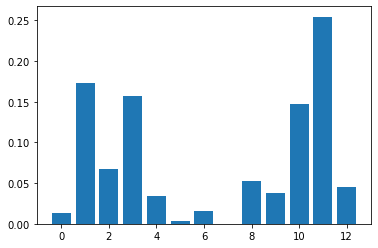

In [39]:
print(xg_reg.feature_importances_)
# plot
pyplot.bar(range(len(xg_reg.feature_importances_)), xg_reg.feature_importances_)
pyplot.show()

In [47]:
# Using support vector machine
from sklearn import svm
regr = svm.SVR()
regr.fit(X_train, y_train)
preds = regr.predict(X_test)
mse = mean_squared_error(y_test, preds)
print("MSE: %f" % (mse))

MSE: 0.025766


In [48]:
# Ridge Regression
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
mse = mean_squared_error(y_test, preds)
print("MSE: %f" % (mse))

MSE: 0.023282


In [50]:
from sklearn.metrics import r2_score
# Lineaer Regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
preds = reg.predict(X_test)
mse = mean_squared_error(y_test, preds)
print("MSE: %f" % (mse))
print(r2_score(y_test, preds))

MSE: 0.023278
0.10209314728639829
